<center><img src="./images/logo_fmkn.png" width=300 style="display: inline-block;"></center> 

## Машинное обучение
### Семинар 14. Многомерная линейная регрессия. Метод главных компонент

<br />
<br />
16 декабря 2021

### Многомерная регрессия

#### Простое решение МНК

Ранее мы выводили, что решением
$$||XW-Y||^2_2 \rightarrow \min_W$$
будет матрица
$$W^{*} = (X^TX)^{-1}X^TY$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

n = 2
l = 100
K = 2
beta= 0.

X = np.random.randn(l, n)
W_true = np.random.randn(n, K)

y = X @ W_true + beta * np.random.randn(l, K)

In [2]:
W = np.linalg.inv(X.T @ X) @ X.T @ y

((W - W_true)**2).mean()

1.4251881588465545e-31

In [3]:
betas = np.linspace(0, 10, 1000)
list_of_errors = []

for beta in betas:
    y = X @ W_true + beta * np.random.randn(l, K)
    
    W = np.linalg.inv(X.T @ X) @ X.T @ y

    list_of_errors.append(((W - W_true)**2).mean())

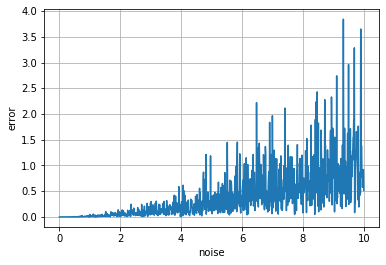

In [8]:
plt.plot(betas, list_of_errors)
plt.xlabel("noise")
plt.ylabel("error")
plt.grid()
plt.show()

### SVD

#### SVD разложение
$$X=VDU^T$$

#### Лемма
$$X^+=(X^TX)^{-1}X^T= \\
  (UD^TV^TVDU^T)^{-1}UD^TV^T= \\
  UD^{-1}D^{-1}U^T UD^TV^T
=UD^{-1}V^T 
$$

#### Решение
$$W^*=UD^{-1}V^TY$$


In [4]:
np.random.seed(42)
n = 2
l = 100
K = 2
beta= 0.

X = np.random.randn(l, n).astype(np.float64)
W_true = np.random.randn(n, K).astype(np.float64)

y = X @ W_true + beta*np.random.randn(l, K)

In [5]:
V, d, U = np.linalg.svd(X, full_matrices=False)

D = np.eye(len(d)) * d 
lambds = d**2

In [6]:
lambds

array([99.10805222, 73.71129184])

Число обусловленности:

In [12]:
np.max(lambds)/np.min(lambds)

1.3445436885287005

In [7]:
W = (U.T @ np.linalg.inv(D) @ V.T) @ y

((W-W_true)**2).mean()

4.0059342843254506e-32

Посмотрим, как меняется ошибка, если число обусловленности растет:

In [8]:
np.random.seed(0)
mus = np.linspace(0.00001, 0.0001, 1000, dtype=np.float64)
list_of_errors = []
beta=0.1
for mu in mus:
    lambds_new = np.array(lambds)
    lambds_new[1] = mu * lambds_new[0]
    d_new = np.sqrt(lambds_new)
    D_new = np.eye(len(d_new)) * d_new
    X_new = V @ D_new @ U
    
    y_new = X_new @ W_true + beta*np.random.randn(l, K)
    
    W = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y_new

    list_of_errors.append(((W-W_true)**2).mean())

<div class="alert alert-info">
<b>Вопрос 1:</b> Объясните код `lambds_new[1] = mu * lambds_new[0]`.
</div>

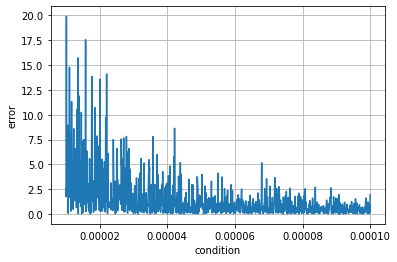

In [9]:
plt.plot(mus, list_of_errors)
plt.xlabel("condition")
plt.ylabel("error")
plt.grid()
plt.show()

<div class="alert alert-info">
<b>Вопрос 2:</b> Мы увеличили невязку, устремив одно из собственных значений к нулю. Что будет, если мы устремим его к бесконечности?
</div>

In [11]:
np.random.seed(0)
mus = np.linspace(0.00001, 0.0001, 1000, dtype=np.float64)
list_of_errors = []
beta=0.1
for mu in mus:
    lambds_new = np.array(lambds)
    lambds_new[1] = lambds_new[0] / mu
    d_new = np.sqrt(lambds_new)
    D_new = np.eye(len(d_new)) * d_new
    X_new = V @ D_new @ U
    
    y_new = X_new @ W_true + beta * np.random.randn(l, K)
    
    W = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y_new

    list_of_errors.append(((W-W_true)**2).mean())

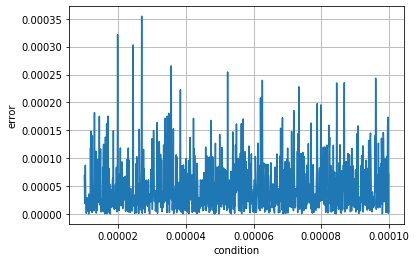

In [29]:
plt.plot(mus, list_of_errors)
plt.xlabel("condition")
plt.ylabel("error")
plt.grid()
plt.show()

### Гребневая регрессия

#### Решение:
$$W^{*} = (X^TX +\tau I)^{-1}X^TY$$

#### SVD:
$$W^*=U(D^2 + \tau I)^{-1}DV^TY$$


In [13]:
np.random.seed(42)
n = 2
l = 100
K = 2
beta = 0.1
mu = 0.00001
X_old = np.random.randn(l, n)

V, d_old, U = np.linalg.svd(X_old, full_matrices=False)

D_old = np.eye(len(d_old)) * d_old
lambds_old = d_old**2

lambds = np.array(lambds_old)
lambds[1] = mu * lambds[0]
d = np.sqrt(lambds)
D = np.eye(len(d)) * d
W_true = np.random.randn(n, K)
X = V @ D @ U

y = X @ W_true + beta * np.random.randn(l, K)

In [14]:
W = (U.T @ np.linalg.inv(D) @ V.T) @ y

((W-W_true)**2).mean()

13.015925827949049

In [15]:
W = (U.T @ np.linalg.inv(D @ D + np.eye(2)) @ D @ V.T) @ y

((W-W_true)**2).mean()

0.06871818815161033

In [17]:
taus = np.geomspace(0.001, 1000, 100)
list_of_errors = []

for tau in taus:
    W = (U.T @ np.linalg.inv(D @ D + tau * np.eye(2)) @ D @ V.T) @ y
    list_of_errors.append(((W-W_true)**2).mean())

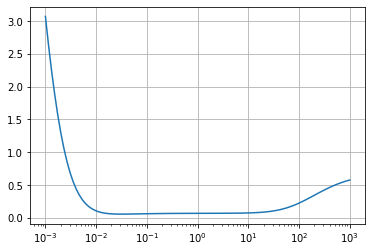

In [18]:
plt.plot(taus, list_of_errors)
plt.xscale("log")
plt.grid()
plt.show()

### Регуляризация

In [19]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
n = 2
l = 15
K = 2
beta=10.0
mu=1e-20
X_old = np.random.randn(l, n)

V, d_old, U = np.linalg.svd(X_old, full_matrices=False)

D_old = np.eye(len(d_old))*d_old
lambds_old = d_old**2 
lambds = np.array(lambds_old)
lambds[1] = mu * lambds[0]
d = np.sqrt(lambds)
D = np.eye(len(d))*d
W_true = np.random.randn(n, K)
X = V @ D @ U
y = X @ W_true + beta * np.random.randn(l, K)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
V, d, U = np.linalg.svd(X_train, full_matrices=False)
D = np.eye(len(d)) * d

In [22]:
W = U.T @ (np.linalg.inv(D)) @ V.T @ y_train
((W - W_true)**2).mean()

1.2043604422706174e+21

In [23]:
W

array([[-9.73108385e+08,  4.56222185e+10],
       [ 1.11525271e+09, -5.22863675e+10]])

In [24]:
W_true

array([[-0.60170661,  1.85227818],
       [-0.01349722, -1.05771093]])

In [25]:
tau=0.1
W = U.T @ np.linalg.inv((D @ D + tau*np.eye(2))) @ D @ V.T @ y_train
((W - W_true)**2).mean()

3.4379177992036176

In [26]:
y_pred = X_test @ U.T @ (np.linalg.inv(D)) @ V.T @ y_train
((y_pred - y_test)**2).mean()

80.21805930083926

In [27]:
tau=1.0
y_pred = (X_test @ U.T @ np.linalg.inv((D@D + tau *np.eye(2))) @ D @ V.T) @ y_train
((y_pred - y_test)**2).mean()

52.77032790018004

In [28]:
taus = np.geomspace(1e-20, 100, 100)
list_of_errors = []
left = X_test @ U.T
right = D @ V.T @ y_train
print(left.shape)
print(right.shape)
for tau in taus:
    y_pred = left @ (np.diag(1 / (d*d + tau)) @ right)
    list_of_errors.append(((y_pred - y_test)**2).mean())

(5, 2)
(2, 2)


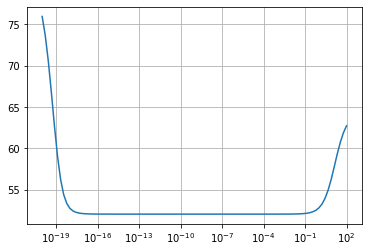

In [29]:
plt.plot(taus, list_of_errors)
plt.xscale("log")
plt.grid()
plt.show()

### PCA (principal component analysis)

#### Ирисы

In [30]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

/tmp/ipykernel_1260/3640362553.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


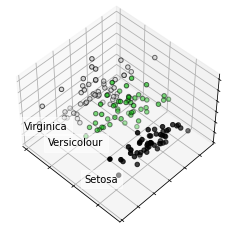

In [31]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

#### Цифры MNIST

In [22]:
# !pip install --upgrade tensorflow

In [32]:
from tensorflow import keras

2021-12-17 14:19:22.603196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-17 14:19:22.603558: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [33]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

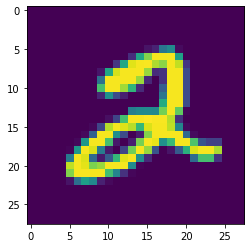

In [34]:
plt.imshow(train_X[5])

In [35]:
print(train_X.shape)
X = train_X.reshape((60000, 28*28))
X.shape

(60000, 28, 28)


(60000, 784)

In [36]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [39]:
new_X = pca.transform(X)

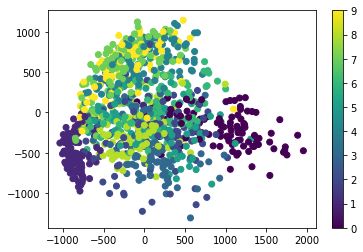

In [41]:
plt.scatter(new_X[:1000, 0], new_X[:1000, 1], c=list(map(lambda x: int(x), train_y[:1000])))
plt.autoscale()

cb = plt.colorbar()
cb.set_ticks(range(10))

### PCA как генеративная модель

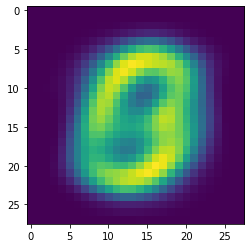

In [47]:
new_img = pca.inverse_transform([500, 50])
plt.imshow(new_img.reshape((28,28)))

1245.6, -38.4


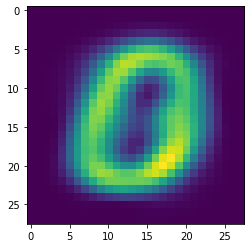

In [49]:
x, y = np.random.normal(loc=500, scale=750), np.random.normal(loc=0,scale=500)
print(f"{x:.1f}, {y:.1f}")

plt.imshow(
    pca.inverse_transform([x, y]).reshape((28,28)))

In [50]:
n_components=10
pca = decomposition.PCA(n_components=n_components)
pca.fit(X)
new_X = pca.transform(X)

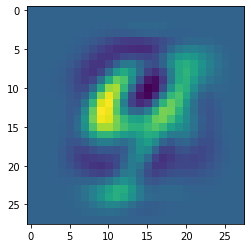

In [55]:
plt.imshow(
    pca.inverse_transform((new_X.max(axis=0) - new_X.min(axis=0)) / 
                          3 * np.random.multivariate_normal(np.zeros(n_components), np.eye(n_components))).reshape((28,28)))